In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
!pip install patool

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.1/98.1 kB 2.0 MB/s eta 0:00:00


In [15]:
import patoolib as pt
pt.extract_archive('/content/archive (3).zip')



INFO patool: Extracting /content/archive (3).zip ...
INFO:patool:Extracting /content/archive (3).zip ...
INFO patool: running /usr/bin/7z x -o./Unpack_2koq0nf4 -- "/content/archive (3).zip"
INFO:patool:running /usr/bin/7z x -o./Unpack_2koq0nf4 -- "/content/archive (3).zip"
INFO patool:     with input=''
INFO:patool:    with input=''
INFO patool: ... /content/archive (3).zip extracted to `apple2orange'.
INFO:patool:... /content/archive (3).zip extracted to `apple2orange'.


'apple2orange'

In [16]:
def load_images(image_dir, target_size=(64, 64)):
    images = []
    labels = []
    for label, class_name in enumerate(os.listdir(image_dir)):
        class_dir = os.path.join(image_dir, class_name)
        for file_name in os.listdir(class_dir):
            file_path = os.path.join(class_dir, file_name)
            img = Image.open(file_path).resize(target_size)
            img_array = np.array(img)
            images.append(img_array)
            labels.append(label)
    return np.array(images), np.array(labels)


In [20]:
git = 'apple2orange'


In [22]:
images, labels = load_images(git)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)


In [24]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [25]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification (apple vs orange)
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [27]:
print(f"Train data shape: {X_train.shape}, Train labels shape: {y_train.shape}")
print(f"Test data shape: {X_test.shape}, Test labels shape: {y_test.shape}")

Train data shape: (2022, 64, 64, 3), Train labels shape: (2022,)
Test data shape: (506, 64, 64, 3), Test labels shape: (506,)


In [28]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 18s 245ms/step - accuracy: 0.3632 - loss: -45443.3789 - val_accuracy: 0.4012 - val_loss: -2376900.0000
Epoch 2/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 17s 265ms/step - accuracy: 0.3918 - loss: -17990112.0000 - val_accuracy: 0.4012 - val_loss: -214831424.0000
Epoch 3/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 19s 236ms/step - accuracy: 0.3972 - loss: -534880800.0000 - val_accuracy: 0.4012 - val_loss: -2813448960.0000
Epoch 4/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 22s 262ms/step - accuracy: 0.3991 - loss: -4980879872.0000 - val_accuracy: 0.4012 - val_loss: -16876260352.0000
Epoch 5/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 16s 257ms/step - accuracy: 0.3926 - loss: -24995778560.0000 - val_accuracy: 0.4012 - val_loss: -63881367552.0000
Epoch 6/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 15s 232ms/step - accuracy: 0.3816 - loss: -86786269184.0000 - val_accuracy: 0.4012 - val_loss: -180433321984.0000
Epoch 7/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 14s 226ms/step - accuracy: 0.3741 - loss: -236839436288.0000 - val_accurac

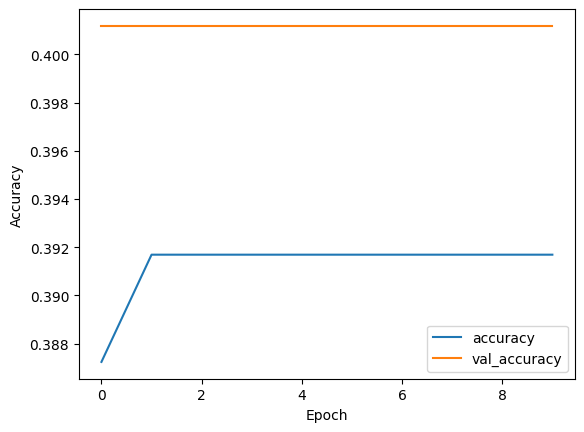

In [29]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [41]:
def display_prediction(test_images, test_labels):
    for i in range(5):
        img = test_images[i]
        plt.imshow(img)
        plt.axis('off')
        plt.show()

        # The following lines were incorrectly indented and are now moved inside the for loop
        prediction = model.predict(np.expand_dims(img, axis=0))
        predicted_class = 'apple' if prediction < 0.5 else 'orange'
        print(f"Prediction: {predicted_class}, Actual: {'apple' if test_labels[i] == 0 else 'orange'}")

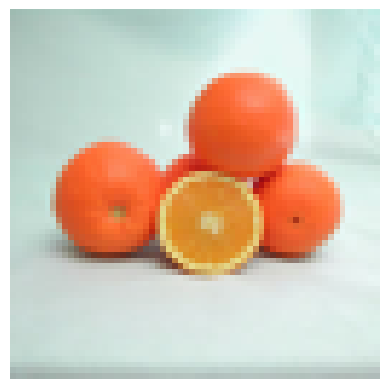

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
Prediction: orange, Actual: orange


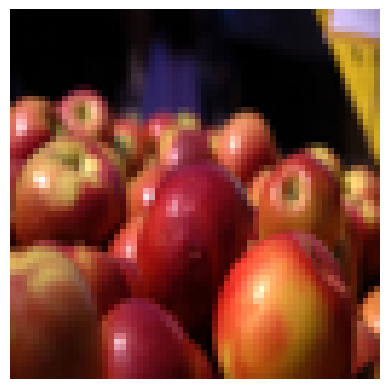

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Prediction: orange, Actual: orange


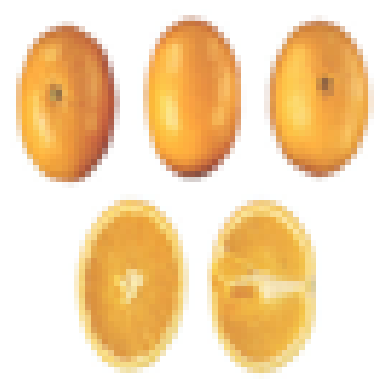

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Prediction: orange, Actual: apple


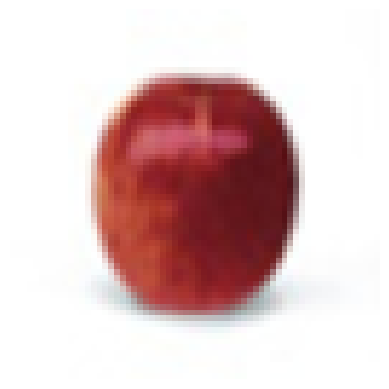

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Prediction: orange, Actual: orange


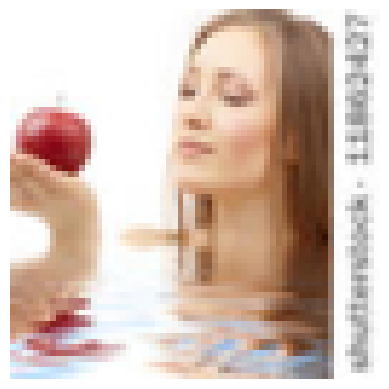

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Prediction: orange, Actual: orange


In [44]:
display_prediction(X_test,y_test)